# Chapter 4 - The Repressilator

This notebook contains all of the figures generated in Chapter 2. All figures were generated as interactive visualizations using the bokeh library.


The notebook contains sections from the 'Design Principles of Genetic Circuits' course at Caltech, Spring term, 2019 (http://be150.caltech.edu/2019/). In particular, the choice of the Python packages was determined by the course. Some of the templates provided as part of the course were used to generate some of the figures. 

In [1]:
import numpy as np
import bokeh.io
import bokeh.plotting

from bokeh.models import Span, Label
from bokeh.io import export_png, output_file, show
from bokeh.layouts import row, column
from bokeh.util.compiler import TypeScript
from bokeh.io import export_svg

import scipy.integrate
import scipy.optimize

# We will use Matplotlib to make a 3D plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


bokeh.io.output_notebook()

Loading BokehJS ...

## The plot for fff(x)

The first plot is related to the linear stability analysis of the repressilator.

In [2]:
#### Plot #1

# Parameters
alpha, n = 4.0,2.0

# f(x)
f = lambda x: alpha / (1 + x**n)

# Make composition of functions
x = np.linspace(0, 3, 200)
fff = f(f(f(x)))

# Show plot
p = bokeh.plotting.figure(height=400, width=600,
                          x_axis_label='x',
                         y_axis_label = "y")
p.line(x, x, line_width=2, legend_label ='y = x')
p.line(x, fff, line_width=2, color='orange', legend_label = "y = fff(x)")
p.legend.location = 'center_right'

show(p)

p.toolbar.logo = None
p.toolbar_location = None

export_png(p, filename="../Results/Images/fff_plot.png")


'/Users/Gordian/Documents/GitHub/MT4599/Results/Images/fff_plot.png'

## Numerically solve for the steady state

In [3]:
def find_steady_state(alpha, n):
    return scipy.optimize.brentq(lambda x: alpha - x*(1+x**n), 0, alpha)

# Compute the fixed point for various beta
alpha = np.linspace(0.1, 100, 200)
x_fp1 = [find_steady_state(b, 3) for b in alpha]
x_fp2 = [find_steady_state(b, 4) for b in alpha]
x_fp3 = [find_steady_state(b, 5) for b in alpha]

# Make the plot
p = bokeh.plotting.figure(width=600, height=400,
                          x_axis_label='alpha',
                          y_axis_label='steady state, p0')
p.line(alpha, x_fp1, line_width=2, legend_label = "n = 3", color='purple')
p.line(alpha, x_fp2, line_width=2, legend_label = "n = 4", color='orange')
p.line(alpha, x_fp3, line_width=2, legend_label = "n = 5", color='red')

bokeh.io.show(p)

p.toolbar.logo = None
p.toolbar_location = None

export_png(p, filename="../Results/Images/find_steady_state.png")


'/Users/Gordian/Documents/GitHub/MT4599/Results/Images/find_steady_state.png'

## Bifurcation Diagram

In [4]:
n = np.linspace(2.01, 6, 200)
alpha = n / 2 * (n / 2 - 1)**(-(1 + 1/n))

# Build the plot
p = bokeh.plotting.figure(height=400, width=600, 
                          x_axis_label='n', y_axis_label='alpha',
                          y_axis_type='log', x_range=[1, 6], 
                          y_range=[1, 2000])
p.patch(np.append(n, n[-1]), np.append(alpha, alpha[0]), 
        color='lightgray', alpha=0.7)
p.line(n, alpha, line_width=4, color='black')
p.text(x=1.3, y=2.5, text=['stable steady state'])
p.text(x=1.3, y=1.5, text=['(dampened oscillations)'])
p.text(x=2.5, y=100, text=['unstable steady state (limit cycle oscillations)'])

bokeh.io.show(p)

p.toolbar.logo = None
p.toolbar_location = None

export_png(p, filename="../Results/Images/repressilator_bifurcation_diagram.png")

'/Users/Gordian/Documents/GitHub/MT4599/Results/Images/repressilator_bifurcation_diagram.png'

## Trajectories of the Repressilator

The following figures were not present in the thesis. The plots show trajectories for the protein concentrations of the repressilator model for different initial conditions. All trajectories converge to the limit cycle. This code was adapted from Elowitz, 2019.

In [26]:
import numpy as np

import biocircuits

import bokeh.models
import bokeh.plotting
import bokeh.io

# We will use Matplotlib to make a 3D plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Note: Check your URL and then set the localhost variable accordingly:
notebook_url = 'localhost:8888'

bokeh.io.output_notebook()

Loading BokehJS ...

The initial conditions of the protein concentration were given by [p1, p2, p3] = [1.  1.  1.2].
The parameters were set to be alpha = 20 and n = 3.


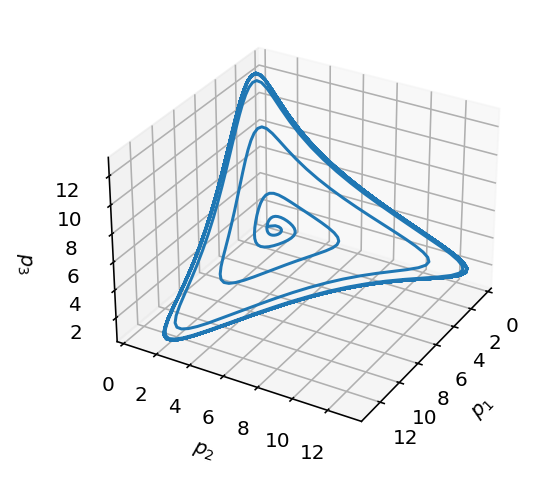

In [27]:
def repressilator_rhs(x, t, alpha, n):
    """
    Returns 3-array of (dx_1/dt, dx_2/dt, dx_3/dt)
    """
    x_1, x_2, x_3 = x
    return np.array([alpha / (1 + x_3**n) - x_1,
                     alpha / (1 + x_1**n) - x_2,
                     alpha / (1 + x_2**n) - x_3])

# Number of points to use in plots
n_points = 1000

t = np.linspace(0, 100, n_points)

# Initial condiations
x0 = np.array([1.0, 1.0, 1.2])

# Resolve problem for alpha = 10 and n = 3
x = scipy.integrate.odeint(repressilator_rhs, x0, t, args=(20, 3))

print("The initial conditions of the protein concentration were given by [p1, p2, p3] = " + str(x0) + ".")
print("The parameters were set to be alpha = 20 and n = 3.")

# Generate the plot
fig_1 = plt.figure()
ax = fig_1.add_subplot(111, projection='3d')
ax.view_init(30, 30)
ax.plot(x[:,0], x[:,1], x[:,2])
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$p_3$');

The initial conditions of the protein concentration were given by [p1, p2, p3] = [ 1  1 20].
The parameters were set to be alpha = 20 and n = 3.


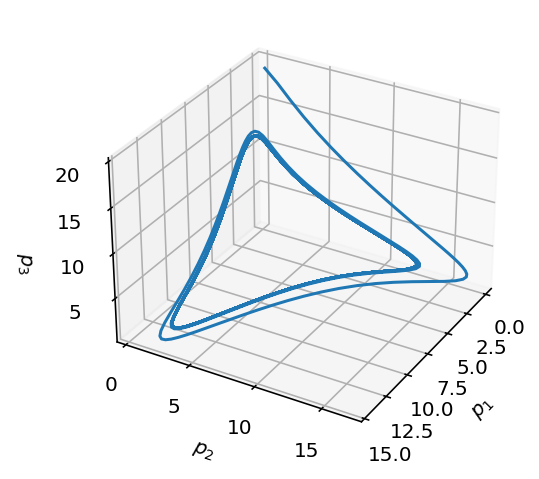

In [28]:
# Initial condiations
x0 = np.array([1, 1, 20])

# Resolve problem for alpha = 20 and n = 3
x = scipy.integrate.odeint(repressilator_rhs, x0, t, args=(20, 3))

print("The initial conditions of the protein concentration were given by [p1, p2, p3] = " + str(x0) + ".")
print("The parameters were set to be alpha = 20 and n = 3.")

# Generate the plot
fig_2 = plt.figure()
ax = fig_2.add_subplot(111, projection='3d')
ax.view_init(30, 30)
ax.plot(x[:,0], x[:,1], x[:,2])
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$p_3$');

The initial conditions of the protein concentration were given by [p1, p2, p3] = [0 0 2].
The parameters were set to be alpha = 20 and n = 3.


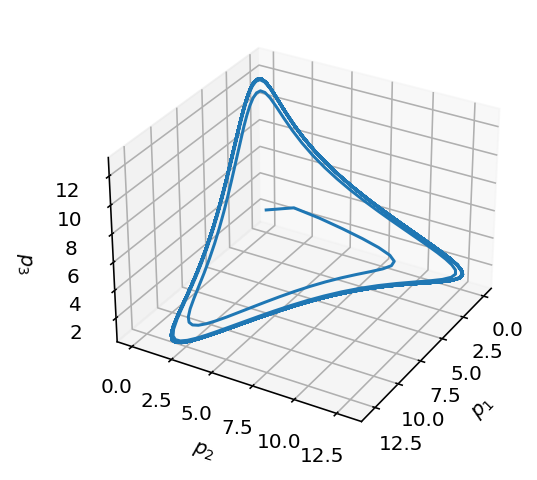

In [29]:
# Initial condiations
x0 = np.array([0, 0, 2])

# Resolve problem for β = 20 and n = 3
x = scipy.integrate.odeint(repressilator_rhs, x0, t, args=(20, 3))

print("The initial conditions of the protein concentration were given by [p1, p2, p3] = " + str(x0) + ".")
print("The parameters were set to be alpha = 20 and n = 3.")

# Generate the plot
fig_3 = plt.figure()
ax = fig_3.add_subplot(111, projection='3d')
ax.view_init(30, 30)
ax.plot(x[:,0], x[:,1], x[:,2])
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$p_3$');

The initial conditions of the protein concentration were given by [p1, p2, p3] = [20  0  2].
The parameters were set to be alpha = 20 and n = 3.


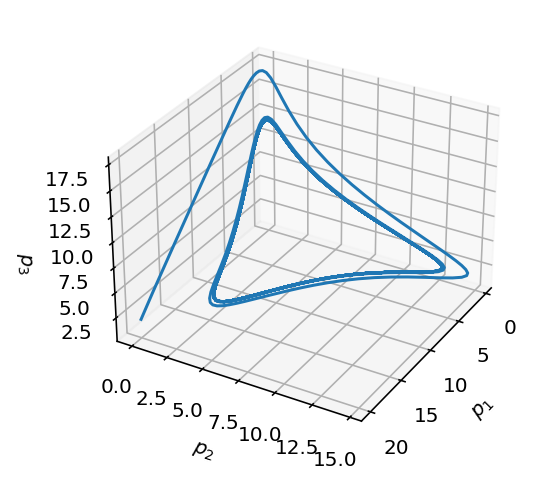

In [30]:
# Initial condiations
x0 = np.array([20, 0, 2])

# Resolve problem for alpha = 20 and n = 3
x = scipy.integrate.odeint(repressilator_rhs, x0, t, args=(20, 3))

print("The initial conditions of the protein concentration were given by [p1, p2, p3] = " + str(x0) + ".")
print("The parameters were set to be alpha = 20 and n = 3.")

# Generate the plot
fig_4 = plt.figure()
ax = fig_4.add_subplot(111, projection='3d')
ax.view_init(30, 30)
ax.plot(x[:,0], x[:,1], x[:,2])
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$p_3$');